# Курс «Введение в нейронные сети»

## Урок 4. Сверточные нейронные сети

### Домашняя работа к уроку 4

In [1]:
from __future__ import print_function
import keras # расскоментируйте эту строку, чтобы начать обучение
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import os

#### Задание 1

Попробовать улучшить точность распознования образов cifar 10 сверточной нейронной сетью, рассмотренной на уроке. Приложить анализ с описанием того, что улучшает работу нейронной сети и что ухудшает.

In [2]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
class_names = ['самолет', 'автомобиль', 'птица', 'кошка', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

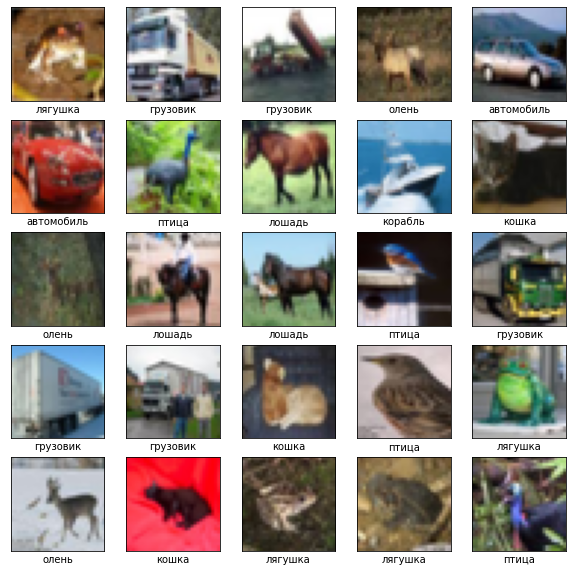

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# конфигурирование слоев нейросети
model = Sequential()

In [8]:
# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [9]:
# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [11]:
# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Использование data augmentation в реальном времени
Instructions for updating:
Please use Model.fit, which supports generators.
1563/1563 [==============================] - 129s 82ms/step - loss: 2.0272 - accuracy: 0.2450 - val_loss: 1.6792 - val_accuracy: 0.3963


In [14]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

сохранить обученную модель как C:\Users\be\source\repos\IntroductionNeuralNetworks\saved_models\keras_cifar10_trained_model.h5 


In [15]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.6792 - accuracy: 0.3963
Test loss: 1.6792353391647339
Test accuracy: 0.39629998803138733


Произведем улучшение в ручную.

In [16]:
# конфигурирование слоев новой нейросети
model_2 = Sequential()

Используем только один сверточный слой.

In [17]:
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))

# model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))

Слой пулинга без прореживания, изображения и так небольшого размера.

In [18]:
model_2.add(MaxPooling2D((2, 2)))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

Еще один сверточный слой и тожек один.

In [19]:
model_2.add(Conv2D(64, (3, 3), activation='relu'))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))

Еще один слой пулинга без прореживания.

In [20]:
model_2.add(MaxPooling2D((2, 2)))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

Добавим еще одну светрку.

In [21]:
model_2.add(Conv2D(64, (3, 3), activation='relu'))

Добавим несколько полносвязных слоев.

In [22]:
model_2.add(Flatten())

# model.add(Flatten())

In [23]:
model_2.add(Dense(64, activation='relu'))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

In [24]:
model_2.add(Dense(10, activation='softmax'))

# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

In [25]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 31s 19ms/step - loss: 1.7760 - accuracy: 0.3413 - val_loss: 1.2463 - val_accuracy: 0.5484
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2035 - accuracy: 0.5706 - val_loss: 1.0791 - val_accuracy: 0.6159
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0473 - accuracy: 0.6318 - val_loss: 0.9887 - val_accuracy: 0.6527
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9274 - accuracy: 0.6737 - val_loss: 0.9666 - val_accuracy: 0.6629
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8615 - accuracy: 0.6960 - val_loss: 0.9420 - val_accuracy: 0.6762
Epoch 6/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8025 - accuracy: 0.7196 - val_loss: 0.8946 - val_accuracy: 0.6889
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7550 - accuracy: 0.7350 - val_loss: 0.8759 -

313/313 - 1s - loss: 1.1495 - accuracy: 0.7014


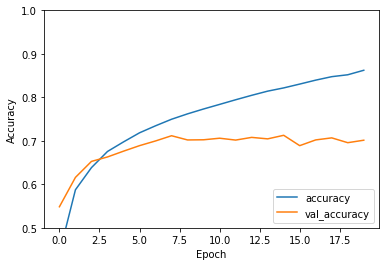

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=2)

In [27]:
print(test_acc)

0.7013999819755554


Убрал прореживание, так как в сверточном слое применяется функция активации релу, а при ее использовании до 40% сами "умирают" без посторонней помощи. Сделал после каждого сверточного слоя слой пулинга.

#### Задание 2

Описать также в анализе какие необоходимо внести изменения в получившуюся у вас нейронную сеть если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET.

Самое главное изменение, это количество нейронов на входном и выходном слоях и выбор соответствующей функции активации на выходном слое. Так же я бы по подбирал бы количество нейронов на скрытых слоях, да и количество скрытых слоев тоже по перебирал бы.